# Unbalanced Classification for Fraud Detection

## Objective

The input dataset contains features such as credit card transaction time, amount, and other hidden features.
The outcome is class (fraud or not).

Using machine learning, we will predict whether a transaction is fraud or not.

In particular, we need to deal with an imbalanced dataset. To do so, we consider these approaches:
- Collecting more data, if possible
- Changing the performance metrics (precision, recall, f1-score, ...)
- Resampling the data (oversampling, undersampling, SMOTE, ...)
- Changing the MLAs



In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Data Cleaning

In [7]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No gap or missing value exists in any variable.

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


For the Amount and Class, the data description makes sense, and the mean, min, and max values are reasonable. For example, there is no negative value.

### No Feature Engineering:

To keep the privacy of customers, the input data data was scaled and the feature names were hidden. So, we have no information about the nature of features, and feature engineering is not practical in this project.

## Exploratory Data Analysis

% of fraud transactions:  0.1727485630620034
% of non-fraud transactions:  99.827251436938


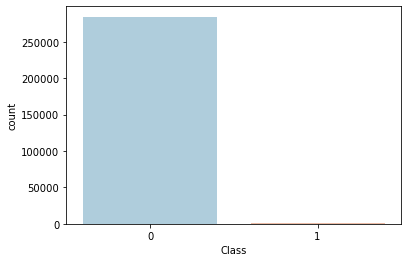

In [9]:
fraud = df.Class[df.Class == 1].count() / df.Class.count() * 100
non_fraud = 100 - fraud
print('% of fraud transactions: ', fraud)
print('% of non-fraud transactions: ', non_fraud)

sb.countplot('Class', data=df, palette='RdBu_r')
plt.show()

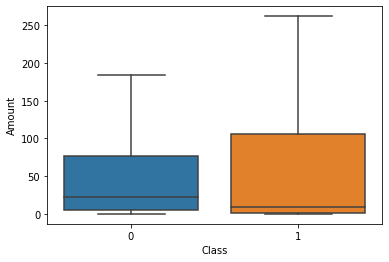

In [10]:
sb.boxplot(x = 'Class', y ='Amount', data = df, showfliers = False)
plt.show()

There seems to be no significant difference in the amount of transaction between non-fraud and fraud transactions.

<Figure size 720x576 with 0 Axes>

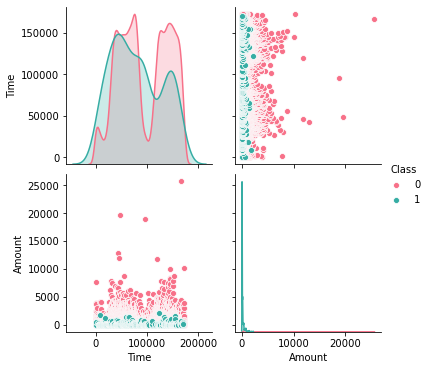

In [11]:
plt.figure(figsize = [10, 8])
sb.pairplot(df[['Time','Amount','Class']], hue='Class', palette = 'husl')
plt.show()

### Scaling Amount and Time:

In [12]:
df['Amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

## Implementing MLAs:

### Spliting the data into test and train sets:

- We use basic split method, which is "train_test_split".
- Since the data is imbalanced, there is a risk that the ratio of fraud to non-fraud changes by using "train_test_split". What if there is no fraud case in test set?
- To address this concern, we calculate the percentage of fraud and non-fraud cases in test and train sets. Fortunately, the percentage of classes is unchanged in test and train sets.
- Alternatively, you can use stratified sampling.

In [13]:
y = df.Class
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
tr_fraud = y_train[y_train == 1].count() / y_train.count() * 100
tr_non_fraud = 100 - tr_fraud

print('% of train fraud transactions: ', tr_fraud)
print('% of train non-fraud transactions: ', tr_non_fraud)
print('\n')

te_fraud = y_test[y_test == 1].count() / y_test.count() * 100
te_non_fraud = 100 - te_fraud
print('% of test fraud transactions: ', te_fraud)
print('% of test non-fraud transactions: ', te_non_fraud)

% of train fraud transactions:  0.171607891329632
% of train non-fraud transactions:  99.82839210867037


% of test fraud transactions:  0.1773111899160844
% of test non-fraud transactions:  99.82268881008392


### 1. Defining a baseline:

Here, the baseline is a naive model that always gives non-fraud as the answer!
When we implement an MLA, our final result should be much better than the baseline; otherwise our model is useles.

In [34]:
y_baseline = y_test.copy()
y_baseline[:] = 0

print('Accuracy:', metrics.accuracy_score(y_test, y_baseline))
print('Recall:', metrics.recall_score(y_test, y_baseline))
print('Precision:', metrics.precision_score(y_test, y_baseline))
print('f1-score:', metrics.f1_score(y_test, y_baseline))

Accuracy: 0.9982268881008391
Recall: 0.0
Precision: 0.0
f1-score: 0.0


### 2. Implementing Logistic Regression:

In [16]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

### Changing the performance metrics.

When working with an imbalanced data, accuracy is very misleading. Instead, we use recall, precision, and f1-score. 

In [17]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_lr))
print('Recall:', metrics.recall_score(y_test, y_pred_lr))
print('Precision:', metrics.precision_score(y_test, y_pred_lr))
print('f1-score:', metrics.f1_score(y_test, y_pred_lr))

Accuracy: 0.9991924440855307
Recall: 0.6336633663366337
Precision: 0.8767123287671232
f1-score: 0.7356321839080459


The imbalanced dataset causes low recall, precision, and f1-score.

### 3. Improved Logistic Regression:

We will use the hyperparameter class_weight, so that our MLA will be more appropriate for imbalanced data.

In [18]:
log_reg_cw = LogisticRegression(solver='liblinear', class_weight='balanced')
log_reg_cw.fit(X_train, y_train)
y_pred_lr_cw = log_reg_cw.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred_lr_cw))
print('Recall:', metrics.recall_score(y_test, y_pred_lr_cw))
print('Precision:', metrics.precision_score(y_test, y_pred_lr_cw))
print('f1-score:', metrics.f1_score(y_test, y_pred_lr_cw))

Accuracy: 0.9770197675643412
Recall: 0.9405940594059405
Precision: 0.06795422031473533
f1-score: 0.1267511674449633


Recall is improved at the expense of lowering precision (which is close to zero); so this is not satisfactory.

### 4. Changing the MLAs (Here, Random Forest)

Some MLAs are not proper for imbalanced data (e.g. logistic regresison), but some others perform better on both balanced and imbalanced data (decision tree, and random forest).

In [19]:
rand_forst = RandomForestClassifier(n_estimators=50, random_state=0)
rand_forst.fit(X_train, y_train)
y_pred_rf = rand_forst.predict(X_test)

In [20]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rf))
print('Recall:', metrics.recall_score(y_test, y_pred_rf))
print('Precision:', metrics.precision_score(y_test, y_pred_rf))
print('f1-score:', metrics.f1_score(y_test, y_pred_rf))

Accuracy: 0.9994908886626171
Recall: 0.7821782178217822
Precision: 0.9186046511627907
f1-score: 0.8449197860962566


Although recall, precision, and f1-ssocre are not ideal, random forest provided the highest scores, so far.

### Confusion Matrix for Random Forest:

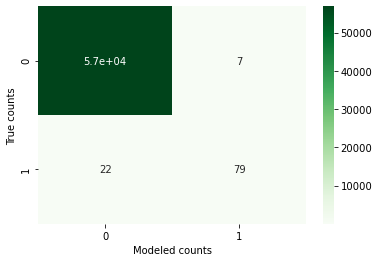

In [21]:
#y_pred = cross_val_predict(rand_forst, X_train, y_train)
sb.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Greens')
plt.xlabel('Modeled counts')
plt.ylabel('True counts')
plt.show()

- The result of confusion matrix is good when the values on the upper left and lower right (True negative and true positive, respectively) are high and other values are low, which is the case here.
- This verifies that there is no systematic error that our MLA always predicts non-fraud when there is fraud.
- False negative is not ideal (~ one fifth of all negatives), which is why recall is not too high.

## Resampling the data:

**Important:**

To avoid overfitting, we need to split the data into test and train sets BEFORE resampling. Resampling should be performed on train set, NOT test set.

### a) Oversampling:

- Oversampling increases the number of cases of minority class by adding copies of them to the dataset.
- If you do not have a huge dataset (of the order of million rows), then oversampling might work for you.

In [22]:
df_train = pd.concat([X_train, y_train], axis=1)

fraid_tr = df_train[df_train.Class == 1]
non_fraid_tr = df_train[df_train.Class == 0]

fraud_tr_os = resample(fraid_tr, n_samples=len(non_fraid_tr), replace=True, random_state=0)

df_tr_os = pd.concat([fraud_tr_os, non_fraid_tr])

% of fraud transactions:  50.0
% of non-fraud transactions:  50.0


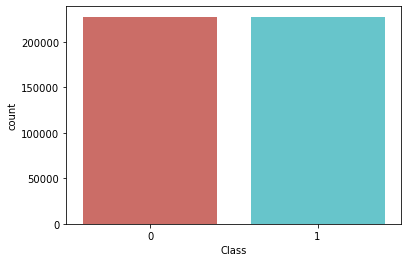

In [23]:
fraud = fraud_tr_os.Class.count() / df_tr_os.Class.count() * 100
non_fraud = 100 - fraud
print('% of fraud transactions: ', fraud)
print('% of non-fraud transactions: ', non_fraud)

sb.countplot('Class', data=df_tr_os, palette='hls')
plt.show()

- The number of fraud cases are increased and is now equal to the number of non-fraud cases.
- The balanced dataset shows higher correlation between some variables, compared to imbalanced dataset. For example, V4 and V11 show relatively high positive correlation with Class, whereas V12 and V14 show relatively high negative correlation with Class:

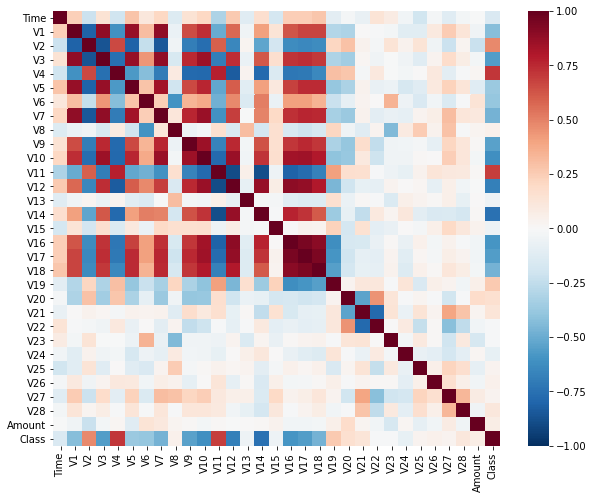

In [24]:
plt.figure(figsize = [10, 8])
sb.heatmap(df_tr_os.corr(), vmin=-1, vmax=1, cmap = 'RdBu_r') #annot=True
plt.show()

<Figure size 720x576 with 0 Axes>

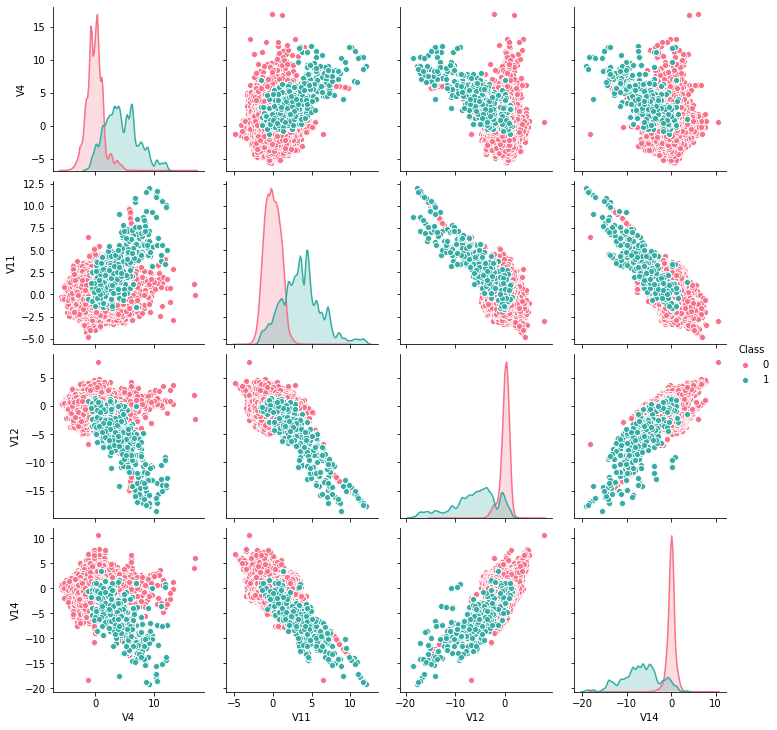

In [59]:
plt.figure(figsize = [10, 8])
sb.pairplot(df_tr_os[['V4','V11','V12','V14','Class']], hue='Class', palette = 'husl')
plt.show()

We see that the outcome Class is strongly dependent of features such as V4, V11, V12, and V14.

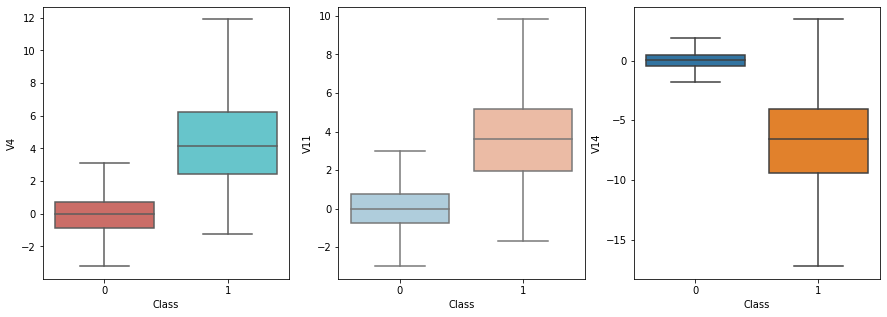

In [60]:
fig, axis = plt.subplots(1, 3,figsize=(15,5))
sb.boxplot(x = 'Class', y ='V4', data = df_tr_os, ax = axis[0], showfliers = False, palette = 'hls')
sb.boxplot(x = 'Class', y ='V11', data = df_tr_os, ax = axis[1], showfliers = False, palette = 'RdBu_r')
sb.boxplot(x = 'Class', y ='V14', data = df_tr_os, ax = axis[2], showfliers = False)
plt.show()

### Logistic Regression after Oversampling:

In [25]:
X_tr = df_tr_os.drop('Class', axis=1)
y_tr = df_tr_os.Class

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_tr, y_tr)
y_pred_lr_os = log_reg.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred_lr_os))
print('Recall:', metrics.recall_score(y_test, y_pred_lr_os))
print('Precision:', metrics.precision_score(y_test, y_pred_lr_os))
print('f1-score:', metrics.f1_score(y_test, y_pred_lr_os))

Accuracy: 0.9769846564376251
Recall: 0.9504950495049505
Precision: 0.06847360912981455
f1-score: 0.12774451097804393


The oversampling has improved the recall significantly, but at the expense of lowering the precision.

### Random Forest after Oversampling:

In [26]:
rand_forst = RandomForestClassifier(n_estimators=50, random_state=0)
rand_forst.fit(X_tr, y_tr)
y_pred_rf_os = rand_forst.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rf_os))
print('Recall:', metrics.recall_score(y_test, y_pred_rf_os))
print('Precision:', metrics.precision_score(y_test, y_pred_rf_os))
print('f1-score:', metrics.f1_score(y_test, y_pred_rf_os))

Accuracy: 0.9995435553526912
Recall: 0.8118811881188119
Precision: 0.9213483146067416
f1-score: 0.8631578947368421


- Oversampling slightly improves all three scores (recall, precision, f1-score).
- The confusion matrix shows that oversampling decreases the false negatives:

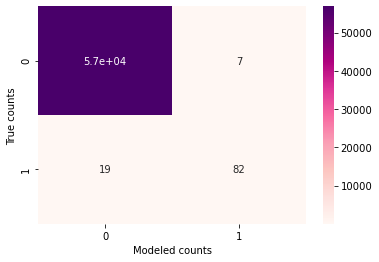

In [27]:
sb.heatmap(confusion_matrix(y_test, y_pred_rf_os), annot=True, cmap='RdPu')
plt.xlabel('Modeled counts')
plt.ylabel('True counts')
plt.show()

### b) Undersampling

- Another resampling method is undersampling, which removes some data from the majority class.
- Pros: works well when we have a huge dataset (e.g. of the order of million rows).
- cons: we are losing valuable informaiton by removing data points, and this might cause underfitting.
- Therefore, we don't explore undersampling in this project.

### c) SMOTE

- SMOTE or Synthetic Minority Oversampling Technique uses the k-nearest neighbors technique to create synthetic and new data points.

In [28]:
smote = SMOTE(sampling_strategy=1.0, random_state=0)
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

In [29]:
fraud = y_train_sm[y_train_sm == 1].count() / y_train_sm.count() * 100
non_fraud = 100 - fraud
print('% of fraud transactions: ', fraud)
print('% of non-fraud transactions: ', non_fraud)

% of fraud transactions:  50.0
% of non-fraud transactions:  50.0


### Logistic Regression after SMOTE:

In [30]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train_sm, y_train_sm)
y_pred_lr_sm = log_reg.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred_lr_sm))
print('Recall:', metrics.recall_score(y_test, y_pred_lr_sm))
print('Precision:', metrics.precision_score(y_test, y_pred_lr_sm))
print('f1-score:', metrics.f1_score(y_test, y_pred_lr_sm))

Accuracy: 0.9755977669323409
Recall: 0.9405940594059405
Precision: 0.06423258958755916
f1-score: 0.12025316455696204


Similar to oversampling, SMOTE has improved the recall significantly, but at the expense of lowering the precision.

### Random Forest after SMOTE:

In [31]:
rand_forst = RandomForestClassifier(n_estimators=50, random_state=0)
rand_forst.fit(X_train_sm, y_train_sm)
y_pred_rf_sm = rand_forst.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rf_sm))
print('Recall:', metrics.recall_score(y_test, y_pred_rf_sm))
print('Precision:', metrics.precision_score(y_test, y_pred_rf_sm))
print('f1-score:', metrics.f1_score(y_test, y_pred_rf_sm))

Accuracy: 0.9994908886626171
Recall: 0.8217821782178217
Precision: 0.8829787234042553
f1-score: 0.8512820512820514


- Compared to oversampling, SMOTE slightly improves recall, but precision slightly decreases.
- Compared to oversampling, the confusion matrix shows that SMOTE slightly decreases the false negatives, but slightly increases false posivies.

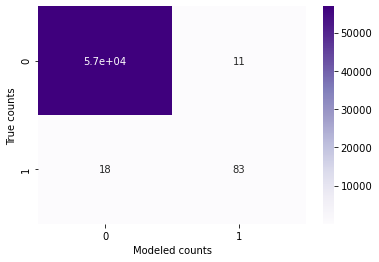

In [32]:
sb.heatmap(confusion_matrix(y_test, y_pred_rf_sm), annot=True, cmap='Purples')
plt.xlabel('Modeled counts')
plt.ylabel('True counts')
plt.show()

In [35]:
print('Logistic Regression: ', roc_auc_score(y_test, y_pred_lr))
print('Improved Logistic Regression: ', roc_auc_score(y_test, y_pred_lr_cw))
print('Random Forest: ', roc_auc_score(y_test, y_pred_rf))
print('Logistic Regression after Oversampling: ', roc_auc_score(y_test, y_pred_lr_os))
print('Random Forest after Oversampling: ', roc_auc_score(y_test, y_pred_rf_os))
print('Logistic Regression after SMOTE: ', roc_auc_score(y_test, y_pred_lr_sm))
print('Random Forest after SMOTE: ', roc_auc_score(y_test, y_pred_rf_sm))


Logistic Regression:  0.8167525428084921
Improved Logistic Regression:  0.9588392642749968
Random Forest:  0.891027555297694
Logistic Regression after Oversampling:  0.9637633792045601
Random Forest after Oversampling:  0.9058790404462089
Logistic Regression after SMOTE:  0.9581270010365732
Random Forest after SMOTE:  0.9107943620024582


### Summary: ROC Curve

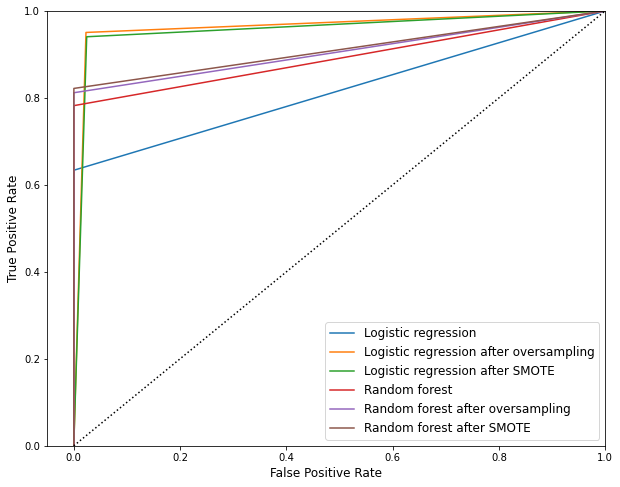

In [57]:
fpr_lr, tpr_lr, thr_lr          = roc_curve(y_test, y_pred_lr)
fpr_lr_os, tpr_lr_os, thr_lr_os = roc_curve(y_test, y_pred_lr_os)
fpr_lr_sm, tpr_lr_sm, thr_lr_sm = roc_curve(y_test, y_pred_lr_sm)
fpr_rf, tpr_rf, thr_rf          = roc_curve(y_test, y_pred_rf)
fpr_rf_os, tpr_rf_os, thr_rf_os = roc_curve(y_test, y_pred_rf_os)
fpr_rf_sm, tpr_rf_sm, thr_rf_sm = roc_curve(y_test, y_pred_rf_sm)

plt.figure(figsize=(10,8))
plt.plot(fpr_lr, tpr_lr,       label='Logistic regression')
plt.plot(fpr_lr_os, tpr_lr_os, label='Logistic regression after oversampling')
plt.plot(fpr_lr_sm, tpr_lr_sm, label='Logistic regression after SMOTE')
plt.plot(fpr_rf, tpr_rf,       label='Random forest')
plt.plot(fpr_rf_os, tpr_rf_os, label='Random forest after oversampling')
plt.plot(fpr_rf_sm, tpr_rf_sm, label='Random forest after SMOTE')
plt.plot([0, 1], [0, 1], 'k:')

plt.xlim([-0.05, 1])
plt.ylim([0, 1])
plt.legend(fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.show()

- Among resampling methods, SMOTE leads to highest TPR.
- Among MLAs, ramdom forest has lower FPR, but logistic regression has higher TPR.
- The trade-off between higher TPR and lower FPR depends on the project objective. What percentage of false positives is acceptable? 
- In the case of fraud detection, it is not desirable to increase true positive rate at the expense of increasing false positive rate. We do not want our MLA to falsely detect many transactions as fraud!
- Therefore, I am willing to select random forest after SMOTE as the best MLA. Note that SMOTE method is computationally-expensive, so if you have a huge dataset, you might want to use random forest after oversampling or undersampling.